In [27]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

churn = pd.read_csv("./cleaned_ML.csv")
churn.drop(['Unnamed: 0'], axis=1, inplace=True)
churn.head()


,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M
0,1,45,3,1,1,2,0,39,5,1,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,1
1,1,49,5,3,0,0,0,44,6,1,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1,0
2,1,51,3,3,1,3,0,36,4,1,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,1
3,1,40,3,0,1,2,0,21,5,1,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,1
4,1,44,2,3,1,1,0,36,3,1,...,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0,1


In [28]:

X = churn.drop('Attrition_Flag',axis=1)
y = churn['Attrition_Flag']

<Axes: ylabel='Attrition_Flag'>

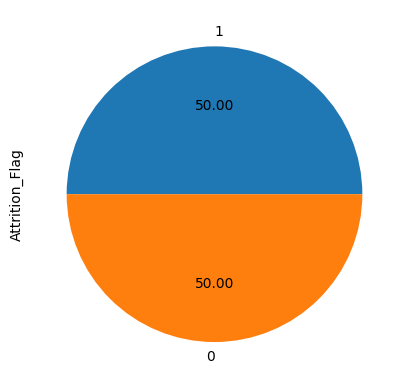

In [29]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy="not minority")
ros = RandomOverSampler(sampling_strategy="not majority")
X_ros, y_ros = ros.fit_resample(X,y)
X_rus, y_rus = rus.fit_resample(X,y)

y_ros.value_counts().plot.pie(autopct='%.2f')


In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
#test of different classifier algorithms
classifier = [
    KNeighborsClassifier(5),
    GaussianNB(),
    DecisionTreeClassifier(max_depth=6),
    SVC(gamma=2, C=1)
]
DecisionTreeClassifier(max_depth=6).get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [31]:
#with Over sampling 
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, random_state=0)

for model in classifier:
    y_pred = model.fit(X_train, y_train).predict(X_test)
    number = X_test.shape[0]
    test = (y_test != y_pred).sum()
    score = model.score(X_test, y_test)
    print(f"the {model} has a score of {score}")


the KNeighborsClassifier() has a score of 0.8967828418230563
the GaussianNB() has a score of 0.7815013404825737
the DecisionTreeClassifier(max_depth=6) has a score of 0.9346514745308311
the SVC(C=1, gamma=2) has a score of 0.9909517426273459


In [32]:
#With Under Sampling 
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, random_state=0)

for model in classifier:
    y_pred = model.fit(X_train, y_train).predict(X_test)
    number = X_test.shape[0]
    score = model.score(X_test, y_test)
    print(f"the {model} has a score of {score}")
    

the KNeighborsClassifier() has a score of 0.829443447037702
the GaussianNB() has a score of 0.7917414721723519
the DecisionTreeClassifier(max_depth=6) has a score of 0.8994614003590664
the SVC(C=1, gamma=2) has a score of 0.4865350089766607


In [33]:

X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, random_state=0)


dtc = DecisionTreeClassifier(random_state=42)

param_grid = { 
    'max_features': ['sqrt', 'log2',None],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'],
}

dtc = RandomizedSearchCV(dtc,
                  param_grid,
                  cv=5,
                  n_iter=20,
                  random_state=42,
)

dtc.fit(X_train,y_train)
print(dtc.best_params_)
print(dtc.best_score_)

{'max_features': None, 'max_depth': 7, 'criterion': 'gini'}
0.9405725711112982


In [34]:

X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, random_state=0)


dtc = DecisionTreeClassifier(random_state=45, max_depth=7,criterion='gini', max_features=None)
dtc.fit(X_train,y_train)
score = model.score(X_test, y_test)
print(score)




0.8689678284182306


0.9436997319034852


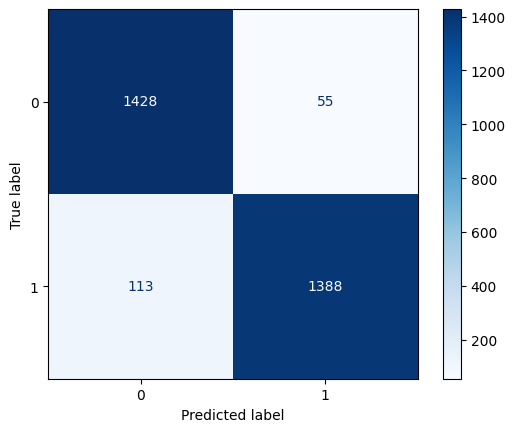

In [35]:
# with standard scaler 
X_train,X_test, y_train, y_test = train_test_split(X_ros,y_ros,random_state=15)

steps=[("scale", StandardScaler()),
       ("model", DecisionTreeClassifier(random_state=45, max_depth=7,criterion='gini', max_features=None))]

pipe = Pipeline(steps)
pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print(pipe.score(X_test,y_test))
disp = ConfusionMatrixDisplay.from_estimator(
        pipe,
        X_test,
        y_test,
        cmap=plt.cm.Blues
    )

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
# 0 = attrited customer, 1 = Existing customer 

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1483
           1       0.96      0.92      0.94      1501

    accuracy                           0.94      2984
   macro avg       0.94      0.94      0.94      2984
weighted avg       0.94      0.94      0.94      2984



<Axes: >

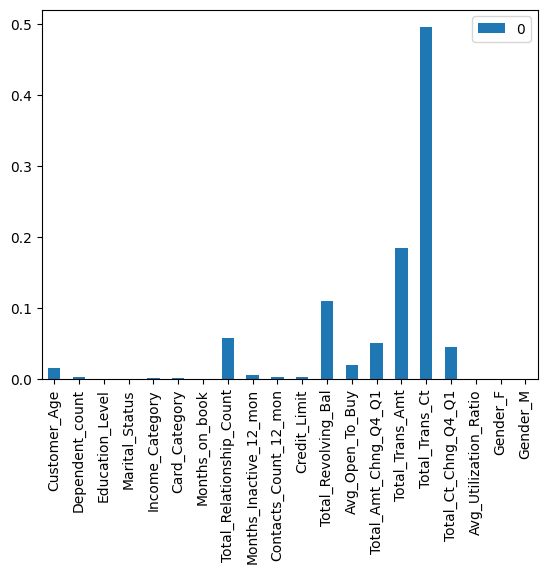

In [37]:
features_names = X.columns
feature_importance = pd.DataFrame(pipe.steps[1][1].feature_importances_,index = features_names)
#features = list(feature_importance[[0]>0].index)
feature_importance.plot(kind='bar')